In [8]:
def gpu_check():
    print(device_lib.list_local_devices())
    print('tf',tf.__version__)
    # print('keras',keras.__version__)
    print('set_global_determinism(seed=1337) 이거 꼭 해라')
    print('set_global_determinism(seed=1337) 이거 꼭 해라')
    print('set_global_determinism(seed=1337) 이거 꼭 해라')

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
import transformers

import torch
print(torch.cuda.is_available())

from tensorflow.python.client import device_lib
gpu_check()

True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12197423647603029303
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5883777643896185706
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12717502820556194277
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6596723933020252959
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [11]:
import tweepy
tweepy.__version__

'3.10.0'

In [12]:
import re
import pandas as pd
import tweepy
from tweepy import StreamListener
from tweepy import Stream

from konlpy.tag import Okt
okt = Okt()

## **Data Load**

In [13]:
final_review = pd.read_csv('final_reviews.csv', index_col=0)
print(final_review.shape)
final_review.head()

(14989, 4)


,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북
2,청주나비솔한의원,10.0,사고 후유증으로 놀라서 한의원 방문 하였고 침 놔주시고 청심환 처방 해주셨습니다 편...,충북
3,청주나비솔한의원,8.8,오래 서있으면 발바닥이 너무 아파서 방문했습니다 진료랑 치료받는 건 괜찮았는데 별로...,충북
4,청주나비솔한의원,10.0,다이어트 환 처방 받았습니다 효과도 꽤 있었고 처음부터 무리하지 않는 선에서 체질에...,충북


In [33]:
train_review = [review for review in final_review['reviews'] if type(review) is str]
train_review

['병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들도친절하시고 의사분도 친절하시고 설명도 잘 해주십니다주말 공휴일에도 진료가돼서 집에선 좀 멀지만가기에 좋았어요항상',
 '체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그리고 양심진료 하시는 것 같아서 믿음이 갔습니다무조건 한약 권하지 않으시고 치료 해주시는 모습이 믿음이 갔어요',
 '사고 후유증으로 놀라서 한의원 방문 하였고 침 놔주시고 청심환 처방 해주셨습니다 편안하게 휴식했습니다 한의원 내부가 깔끔하고 청결 했습니다 감사합니다 다음에 기회되면 또 방문 할게요',
 '오래 서있으면 발바닥이 너무 아파서 방문했습니다 진료랑 치료받는 건 괜찮았는데 별로 효과는 못 봤어요 꾸준히 계속 다녔었는데 대체 뭐가 문제인 건지 아직까지도 계속 아프네요ㅠㅠ',
 '다이어트 환 처방 받았습니다 효과도 꽤 있었고 처음부터 무리하지 않는 선에서 체질에 맞춰 진단 해주셨어요 체질이나 평소 식습관 운동 상태도 꼼꼼히 확인해주시면서 처방해주셨습니다 정말 친절하게 진료 해주셨고 추천추천 합니다',
 '옛날에 턱관절이 어긋난거같은 느낌 다들 아시려나일주일넘게 뚝뚝 거리고 저작할때 너무 아파서 갔는데침맞고 이틀도 안걸려서 나았습니다그이후로 한의학에 관심이생겨팔목이 아파서 갔는데 너무 좋았습니다청주서 젤 유명한 정형외과 갔을땐 체외충격파 뭐하라고 하는둥 무슨 주사를 맞으면 괜찮다더니 그대로입니다 여기서 침맞은게 훨 효과가 좋네요',
 '원장님 친절히 설명 잘 해주셔서 제 몸상탸 잘 알려주셔서 감사했어요 덕분에 효과 좋습니다',
 '주말에 방문하기 좋음먼저 진료실에서 진료를 받고 침대로 옮겼습니다 친절하셨고 체끼가 있어 방문했는데 치료 후 체끼가 많이 내려갔어요 왕뜸을 떠주는데 신기하고 체끼에 도움이 되는거 같았는데 너무 커서 살짝 무서웠어요 직원들은 친절한 편이었어요 주말에 여는 곳을 찾아 방문했던 터라 대기시간은 1시간 가까이 엄청 길었어요 시설은 전반적으로 깨끗하고 

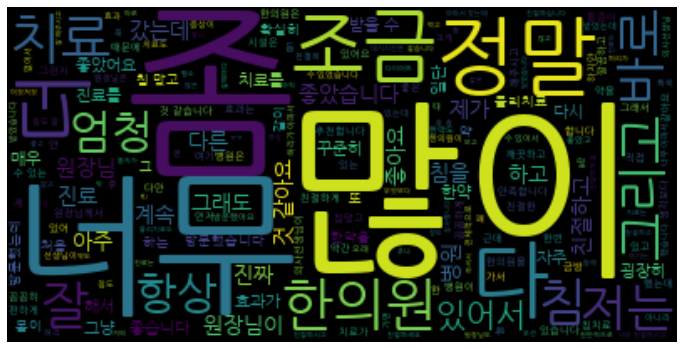

In [35]:
wordcloud = WordCloud(font_path ='NanumGothic.ttf').generate(' '.join(train_review))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation = 'bilinear') # 글자의 배열 형태를 bilinear로 지정, 2개의 선??
plt.axis('off') # x, y 축 나오지 않게하기
plt.show()

In [ ]:
# 명사만
# 부사만 
등등등...